# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Answer 1: For this problem an A/B test will be appropriate. Yes, CLT applies here as drawing samples from any distribution and calulating the means or any other statistic for those samples will result in a normall distribution of means or other statistics. The figures at the end of the notebook demonstrate this.</p>
<p>Answer 2: Null hypothesis : Race has no effect on rate of callbacks. Alternate hypothesis: rate of callbacks is higher for white-sounding names than black-sounding names.
</div>

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

Mean call back rate for 'w' = 0.09659498973305956
Standard error of the mean call back rate for 'w' = 0.0059573966347420985
95% CI of the mean call back rate for 'w' = [ 0.08542094  0.10841889]

Mean call back rate for 'b' = 0.06444804928131417
Standard error of the mean call back rate for 'b' = 0.004984919877968293
95% CI of the mean call back rate for 'b' = [ 0.05462012  0.07433265]


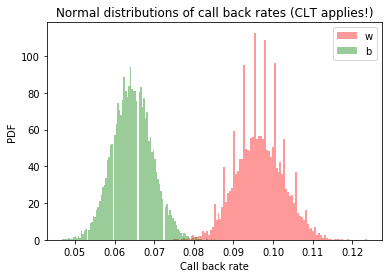


For the null hypothesis the probability of observing a difference equal to or greater than 0.032032854209445585 = 0.0 (p-value = 0.0)

Ans 4: Therefore, we can reject the null hypothesis and conclude that white sounding names have a higher call back rate than black sounding names. This means that there is statistically significant racial discrimination in US labor market.

Ans 5: The analysis shows that race is an important factor but it  does not show that it is the most important factor. There might be other factors such as experience etc. which can affect the callback rate. Expecially, by chance the labels might have been divided in such a way that they might be correlated with some other factor. Therefore, it is important to see that there is no correlation between race and other factors


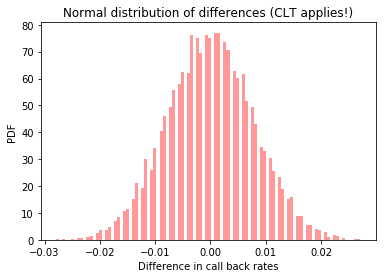

In [6]:
# call backs for w and b
call_w = w.call
call_b = b.call

# call back rates for w and b
call_w_rate = np.sum(call_w)/len(call_w)
call_b_rate = np.sum(call_b)/len(call_b)

# difference in call back rates
diff_rate = call_w_rate - call_b_rate

## 1- Calculating 95% CI for call back rates

# defining a function to bootsrap a sample and return a call back rate
def bs_callback(a, size):
    
    call_rate = np.zeros(size) # initializing an array for call back rates
    
    # generating bootstrap samples and calculatng their call back rates
    for i in range(size):
        bs_rep = np.random.choice(a, len(a))
        call_rate[i] = np.sum(bs_rep)/len(bs_rep)
    
    return call_rate

# calculating mean and 95% CI for call back rates
bs_call_w_rate = bs_callback(call_w, 10000) # 10,000 bs replicates
bs_call_b_rate = bs_callback(call_b, 10000) # 10,000 bs replicates

# statistics for w
mean_call_w_rate = np.mean(bs_call_w_rate) # mean
std_call_w_rate = np.std(bs_call_w_rate) # std
CI95_w = np.percentile(bs_call_w_rate, [2.5, 97.5]) # 95% CI

# statistics for b
mean_call_b_rate = np.mean(bs_call_b_rate) # mean
std_call_b_rate = np.std(bs_call_b_rate) # std
CI95_b = np.percentile(bs_call_b_rate, [2.5, 97.5]) # 95% CI

# printing the results
print("Mean call back rate for 'w' = {}".format(mean_call_w_rate))
print("Standard error of the mean call back rate for 'w' = {}".format(std_call_w_rate))
print("95% CI of the mean call back rate for 'w' = {}".format(CI95_w))

print("\nMean call back rate for 'b' = {}".format(mean_call_b_rate))
print("Standard error of the mean call back rate for 'b' = {}".format(std_call_b_rate))
print("95% CI of the mean call back rate for 'b' = {}".format(CI95_b))

# plotting histogram of bootstrap call back rates
fig = plt.figure()

plt.hist(bs_call_w_rate,
         int(np.sqrt(len(bs_call_w_rate))),
         normed = True,
         color = 'red',
         alpha = 0.4,
         label = 'w')

plt.hist(bs_call_b_rate,
         int(np.sqrt(len(bs_call_b_rate))),
         normed = True,
         color = 'green',
         alpha = 0.4,
         label = 'b')

plt.xlabel('Call back rate')
plt.ylabel('PDF')
plt.legend()
plt.title('Normal distributions of call back rates (CLT applies!)');
plt.show()

## Testing the null hypothesis : race has no effect on call back rate

# defining a function to generate permutation samples and return a difference in call back rate
def perm_callback(a, b, size):
    
    perm_diff_rate = np.zeros(size) # initializing an array for call back rates
    concat_array = np.concatenate([a, b]) # concatenating array a and b
    
    # generating permutation samples, calculatng their call back rates and their differences
    for i in range(size):
        perm_rep = np.random.permutation(concat_array,)
        perm_a = perm_rep[:len(a)]
        perm_b = perm_rep[len(a):]
        perm_diff_rate[i] = (np.sum(perm_a)/len(perm_a)) - (np.sum(perm_b)/len(perm_b))
    
    return perm_diff_rate

# Calculating difference in call back rates for permutation samples
null_diff_rate = perm_callback(call_w,
                               call_b,
                               10000)

# Calculating the probability of obtaining a difference atleast as extreme as observed
pval = np.sum(null_diff_rate >= diff_rate) / len(null_diff_rate)

# printing p-value
print('\nFor the null hypothesis the probability of observing a difference equal to or greater than {} \
= {} (p-value = {})'.format(diff_rate, pval, pval))

# printing conclusions
print('\nAns 4: Therefore, we can reject the null hypothesis and conclude that white sounding names have a \
higher call back rate than black sounding names. This means that there is statistically significant \
racial discrimination in US labor market.')

print('\nAns 5: The analysis shows that race is an important factor but it  \
does not show that it is the most important factor. There might be other factors such as experience etc. which \
can affect the callback rate. Expecially, by chance the labels might have been divided in such a way that they might \
be correlated with some other factor. Therefore, it is important to see that there is no correlation between race \
and other factors')

# plotting histogram of difference in call back rates from permuted samples
fig = plt.figure()

plt.hist(null_diff_rate,
         int(np.sqrt(len(null_diff_rate))),
         normed = True,
         color = 'red',
         alpha = 0.4)

plt.xlabel('Difference in call back rates')
plt.ylabel('PDF')
plt.title('Normal distribution of differences (CLT applies!)');
plt.show()